In [12]:
import os
import pandas as pd
from datetime import datetime
from dotenv import load_dotenv
from sqlalchemy import create_engine
import hvplot.pandas

In [13]:
# Load environment variables from .env file
load_dotenv()

# Access the variables 
psql_username = os.getenv('PSQL_USERNAME')
psql_password = os.getenv('PSQL_PASSWORD')
psql_host = os.getenv('PSQL_HOST')
psql_port = os.getenv('PSQL_PORT')
db_name = os.getenv('SCENARIO_ONE_DB_NAME')

# Define the database url
db_url = f"postgresql://{psql_username}:{psql_password}@{psql_host}:{psql_port}/{db_name}" 

# Create the engine object
engine = create_engine(db_url)

# Write ethe SQL query
query = 'SELECT * FROM trades'

# Read the SQL query into a DataFrame
scenario_one_df = pd.read_sql(query, engine)

# Show the DataFrame's head
scenario_one_df


,trade_count,current_datetime,currency,volume,buy_exchange,buy_price,total_purchase_amount,sell_exchange,sell_price,total_sale_amount,profit,spread_percentage,wallet_balance
0,1,2024-02-25T20:21:31.908295,bitcoin,0.007656,Bitstamp,51569.0000,394.832106,Gemini,51574.98000,394.877891,0.045785,0.011596,5642.045785
1,2,2024-02-25T20:21:31.908295,solana,2.177258,Binance,104.1000,226.652581,Bitstamp,104.16370,226.791273,0.138691,0.061191,5642.184477
2,3,2024-02-25T20:21:31.908295,solana,2.177258,Binance,104.1000,226.652581,Gemini,104.19300,226.855066,0.202485,0.089337,5642.386962
3,4,2024-02-25T20:21:31.908295,solana,2.177258,Binance,104.1000,226.652581,Kraken,104.16000,226.783217,0.130635,0.057637,5642.517597
4,5,2024-02-25T20:22:07.856849,ethereum,0.198855,Gemini,3120.0000,620.427572,Kraken,3120.88000,620.602564,0.174992,0.028205,5642.692589
5,6,2024-02-25T20:22:07.856849,polygon,3288.676059,Binance,0.9942,3269.601738,Poloniex,0.99496,3272.101131,2.499394,0.076443,5645.191983
6,7,2024-02-25T20:22:07.856849,solana,2.174260,Gemini,104.3170,226.812316,Kraken,104.33000,226.840582,0.028265,0.012462,5645.220249
7,8,2024-02-25T20:22:42.500553,ethereum,0.198920,Binance,3120.7400,620.777694,Gemini,3121.20000,620.869198,0.091503,0.014740,5645.311752
8,9,2024-02-25T20:22:42.500553,ethereum,0.198920,Binance,3120.7400,620.777694,Kraken,3121.58000,620.944787,0.167093,0.026917,5645.478845
9,10,2024-02-25T20:23:18.231757,ethereum,0.198945,Binance,3120.7700,620.863013,Kraken,3121.26000,620.960496,0.097483,0.015701,5645.576328


In [50]:
scenario_one_df['current_datetime'] = pd.to_datetime(scenario_one_df['current_datetime'])
scenario_one_df['current_datetime'] = pd.to_datetime(scenario_one_df['current_datetime'].dt.date)

scenario_one_df.set_index('current_datetime')
luffy_summary = scenario_one_df.groupby(['currency', 'buy_exchange'])[['total_purchase_amount','profit', 'spread_percentage', 'wallet_balance']].mean()
luffy_summary_grouped = scenario_one_df.groupby(['currency'])[['total_purchase_amount','profit', 'spread_percentage', 'wallet_balance']].mean()
display(luffy_summary)
display(luffy_summary_grouped)

total_purchase_amount    profit  spread_percentage  \
currency buy_exchange                                                       
bitcoin  Bitstamp                 394.972415  0.144041           0.036460   
         Gemini                   395.105363  0.249658           0.063188   
ethereum Binance                  620.806134  0.118693           0.019119   
         Bitstamp                 620.941540  0.179164           0.028854   
         Gemini                   620.615877  0.245757           0.039596   
         Kraken                   620.947513  0.173192           0.027891   
polygon  Binance                 3269.601738  2.499394           0.076443   
solana   Binance                  226.856951  0.084084           0.037082   
         Gemini                   226.812316  0.028265           0.012462   

                       wallet_balance  
currency buy_exchange                  
bitcoin  Bitstamp         5644.345328  
         Gemini           5646.894528  
ethereum Binance          5645.455641  
         Bitstamp         5645.826152  
         Gemini           5644.417632  
         Kraken           5646.315866  
polygon  Binance          5645.191983  
solana   Binance          5644.754632  
         Gemini           5645.220249

,total_purchase_amount,profit,spread_percentage,wallet_balance
currency,,,,
bitcoin,395.016731,0.179247,0.045369,5645.195061
ethereum,620.791315,0.171421,0.027613,5645.334887
polygon,3269.601738,2.499394,0.076443,5645.191983
solana,226.851992,0.077882,0.034346,5644.806367


<Axes: ylabel='profit'>

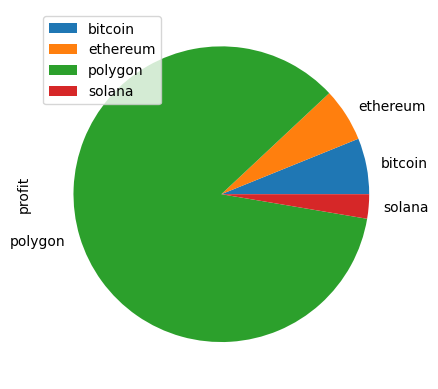

In [24]:
# luffy_summary_grouped.drop(columns=['total_purchase_amount', 'spread_percentage', 'wallet_balance'], inplace=True)
scenario_one_profit = luffy_summary_grouped.plot.pie(y='profit')

scenario_one_profit

In [ ]:
# note- change datetime to only be the time

# returns = scenario_one_df.loc[:,['currency','profit']].set_index(['currency']).pct_change().dropna()
# returns['cummulative_sum'] = returns['profit'].cumsum()
# # returns.hvplot(kind='bar', by='currency').opts(color=['gray', 'red', 'green', 'orange'], hover_color='red', bgcolor='pink')
# returns.hvplot(kind='bar', by='currency', color=['gray', 'red', 'green', 'orange'])

# returns



:Bars   [currency]   (profit)